In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


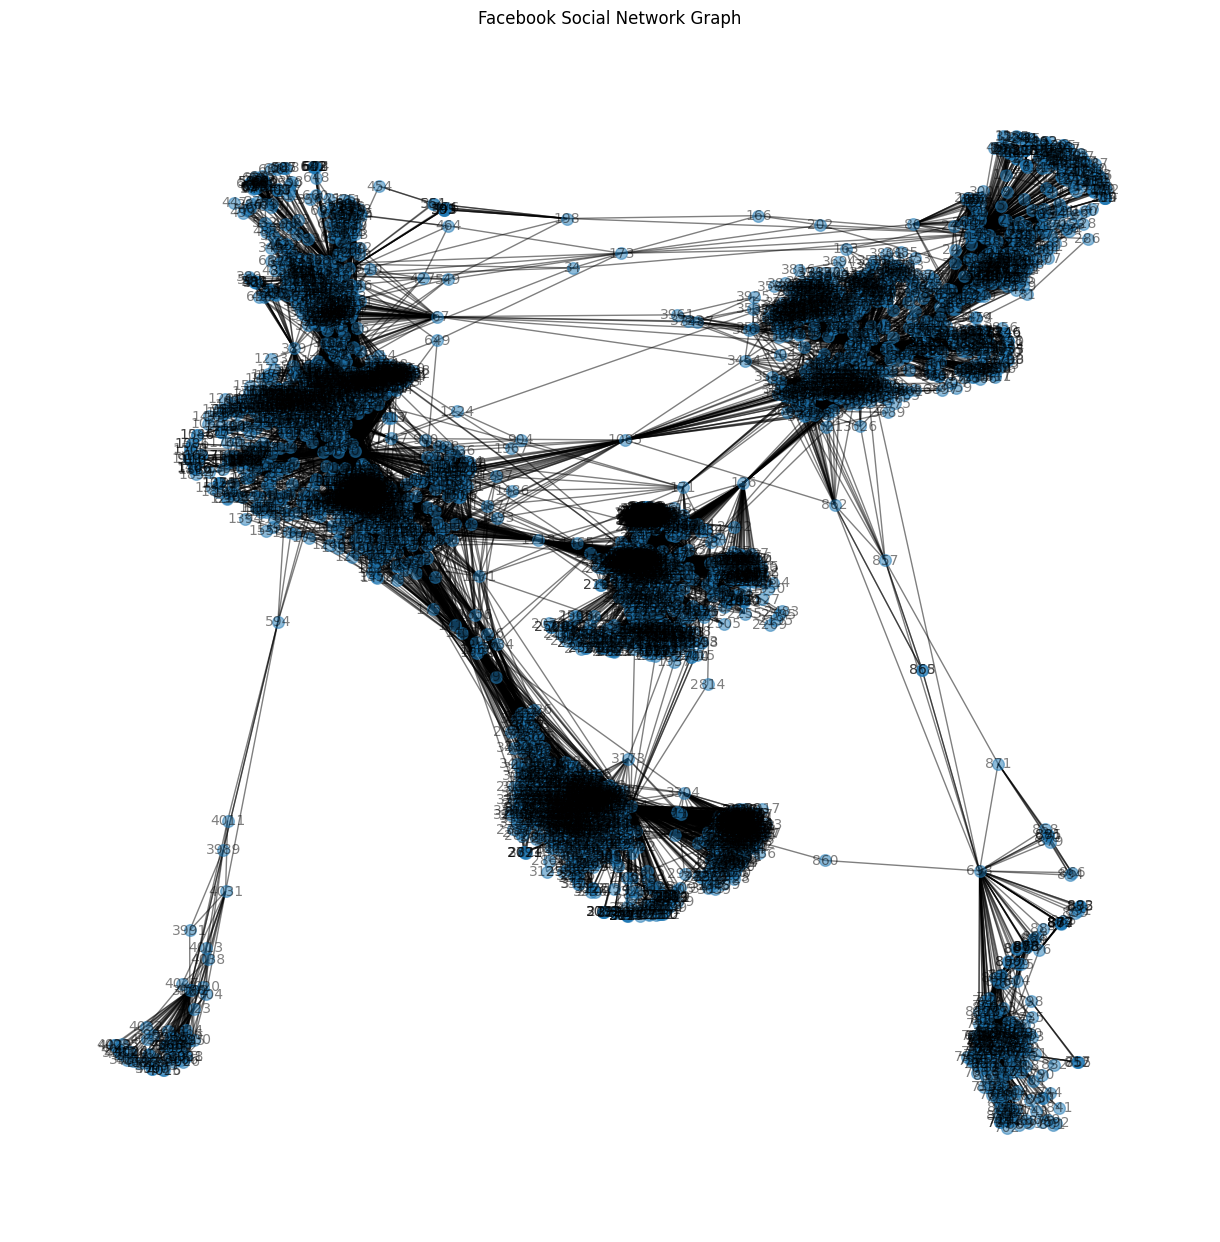

BFS Path from 0 to 1: [0, 1]


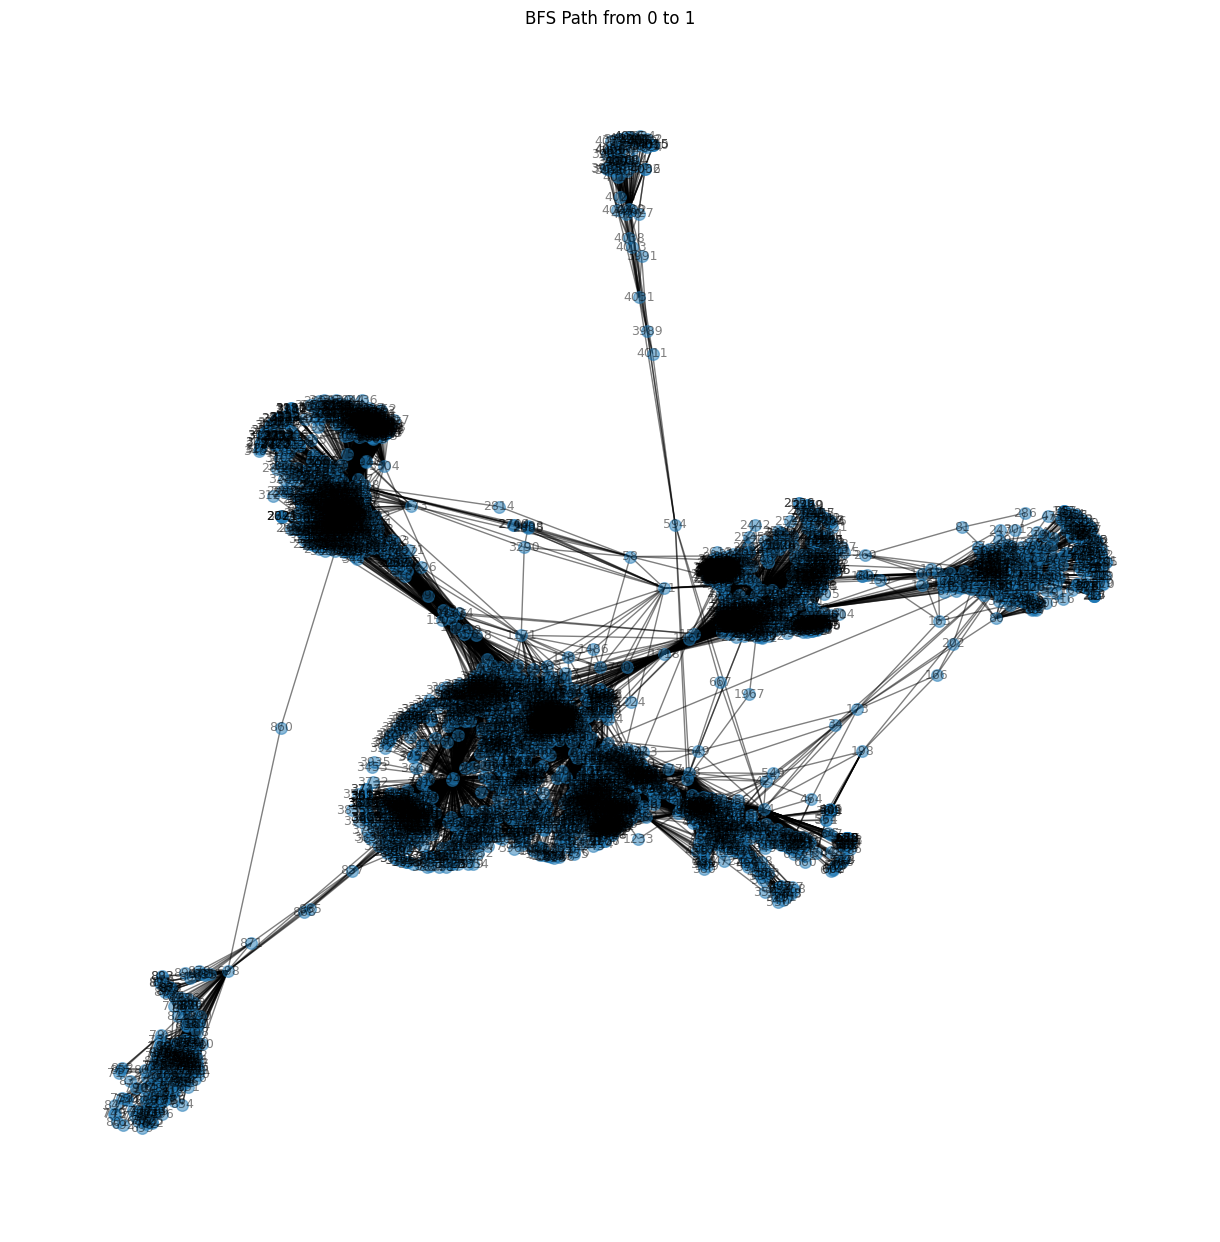

DFS Connections from 0: [0, 347, 339, 340, 324, 332, 331, 271, 342, 325, 313, 315, 345, 322, 341, 323, 308, 338, 252, 334, 318, 261, 314, 236, 304, 285, 303, 239, 344, 311, 277, 294, 77, 231, 329, 320, 346, 330, 302, 299, 300, 130, 257, 295, 258, 291, 280, 297, 272, 281, 309, 284, 251, 197, 184, 159, 172, 298, 265, 248, 200, 276, 232, 224, 213, 249, 266, 254, 242, 204, 196, 194, 187, 180, 101, 317, 158, 168, 129, 31, 237, 84, 83, 51, 25, 336, 88, 186, 223, 246, 136, 2660, 2659, 2658, 2657, 2648, 2647, 2645, 2640, 2639, 2636, 2633, 2627, 2620, 2626, 2585, 2538, 2494, 2583, 2459, 2531, 2616, 2653, 2642, 2649, 2643, 2629, 2609, 2598, 2635, 2533, 2597, 2608, 2617, 2652, 2603, 2610, 2641, 2557, 2637, 2540, 2634, 2421, 2437, 2204, 2034, 2321, 2581, 2565, 2017, 2296, 2612, 2566, 2523, 2488, 2644, 2628, 2618, 2614, 2656, 2562, 2448, 2440, 2577, 2587, 2570, 2535, 2487, 2301, 2281, 2245, 2094, 2167, 1912, 2655, 2654, 2646, 2638, 2630, 2631, 2625, 2624, 2623, 2615, 2619, 2611, 2607, 2606, 2604, 2

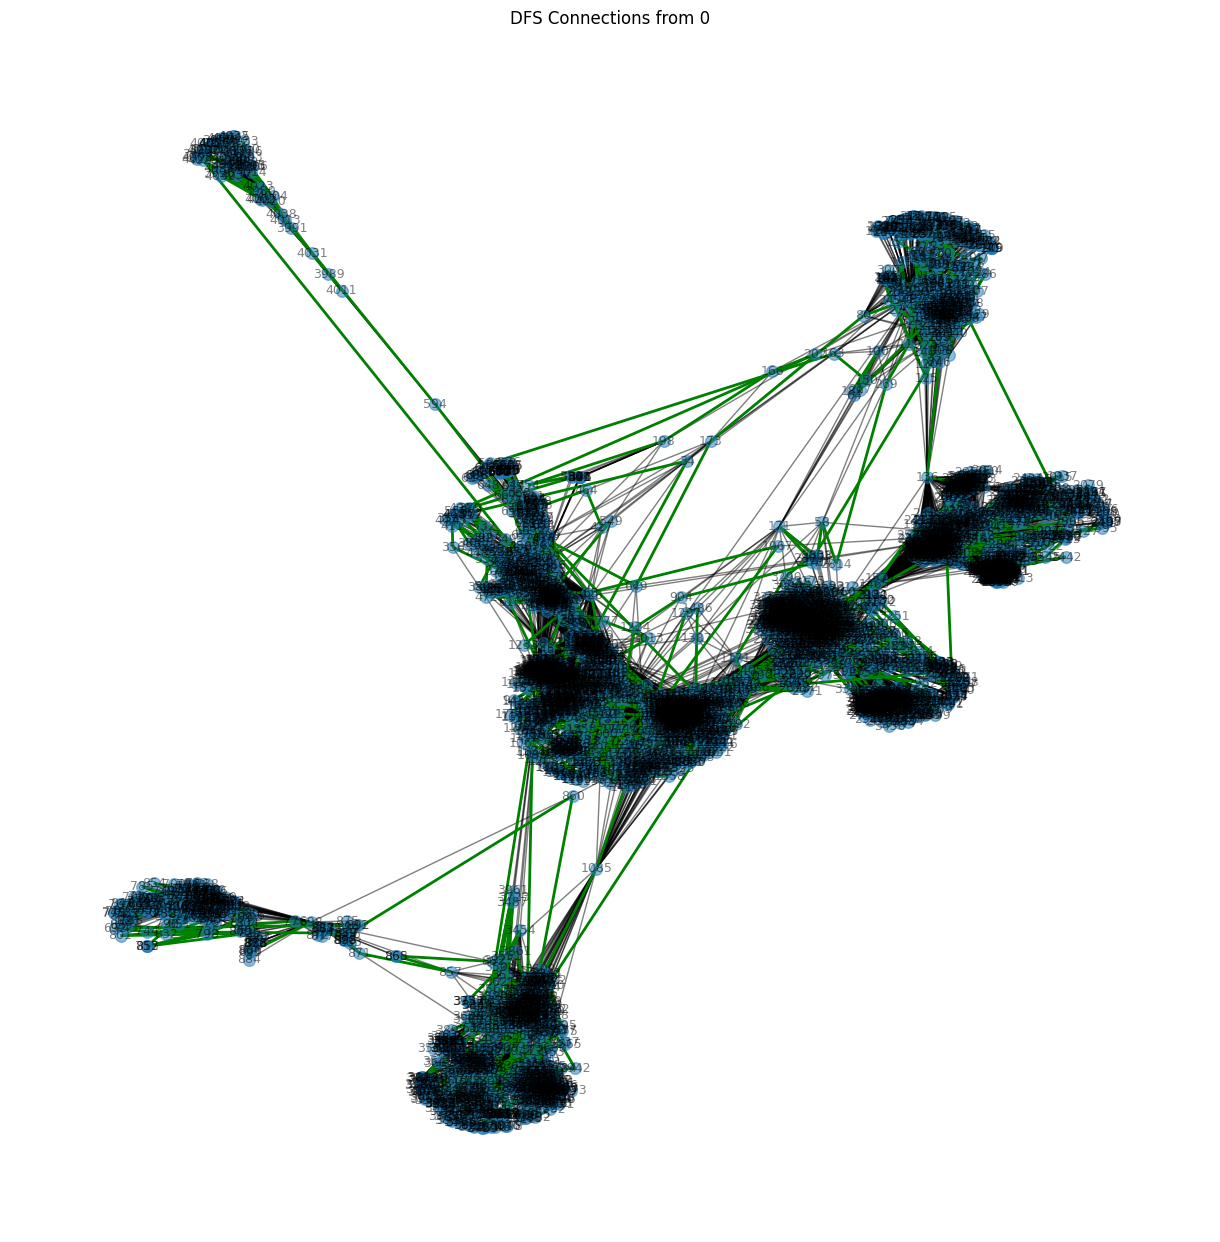

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt
def load_data(file_path):
    G=nx.read_edgelist(file_path,comments='#',delimiter=' ',nodetype=int)
    return G

def bfs(graph,start_user,end_user):
    visited=set()
    queue=[(start_user,[start_user])]
    while queue:
        current,path=queue.pop(0)
        if current==end_user:
            return path

        if current not in visited:
            visited.add(current)
            for i in graph.neighbors(current):
                queue.append((i,path+[i]))

    return None


def dfs(graph,start_user):
    visited=set()
    stack=[start_user]
    connections=[]
    while stack:
        current=stack.pop()
        if current not in visited:
            visited.add(current)
            connections.append(current)
            for i in graph.neighbors(current):
                stack.append(i)
    return connections


def draw_graph(graph):
    plt.figure(figsize=(12,12))
    pos=nx.spring_layout(graph)
    nx.draw(graph,pos,with_labels=True,node_size=70,font_size=10,alpha=0.5)
    plt.title("Facebook Social Network Graph")
    plt.show()

def draw_path(graph,path,title):
    plt.figure(figsize=(12,12))
    pos=nx.spring_layout(graph)
    nx.draw(graph,pos,with_labels=True,node_size=70,font_size=9,alpha=0.5)
    path_edges=list(zip(path,path[1:]))
    nx.draw_networkx_edges(graph,pos,edgelist=path_edges,edge_color='g',width=2)
    plt.title(title)
    plt.show()




if __name__ == "__main__":
    file_path = '/content/drive/MyDrive/Colab Notebooks/facebook_combined.txt'
    G = load_data(file_path)
    draw_graph(G)
    start_user = 0
    bfs_path=bfs(G,start_user,1)
    if bfs_path:
        print("BFS Path from {} to {}: {}".format(start_user,1,bfs_path))
        draw_path(G,bfs_path,"BFS Path from {} to {}".format(start_user,1))
    else:
        print("No path found using BFS from {} to {}".format(start_user,1))
    dfs_path=dfs(G,start_user)
    print("DFS Connections from {}: {}".format(start_user,dfs_path))
    draw_path(G,dfs_path,"DFS Connections from {}".format(start_user))